[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/GeomaticsCaminosUPM/GeoVisionModels/blob/main/sam_text_based_segmentation_exampe.ipynb)

#Text-based Segmentation

If running from Colab:

Go to Runtime -> Change Runtime Type: under Hardware Accelerator, select GPU and choose GPU type T4.

If running locally:

Ensure you have an Nvidia GPU with its drivers and CUDA toolkit installed.

  -drivers https://www.nvidia.es/Download/index.aspx?lang=es

  -cuda toolkit https://developer.nvidia.com/cuda-downloads

Source: https://github.com/facebookresearch/segment-anything/blob/main/notebooks/automatic_mask_generator_example.ipynb

In [3]:
!pip install segment-geospatial groundingdino-py leafmap localtileserver #install libraries

In [ ]:
import leafmap #leafmap interactive maps from google earth https://leafmap.org/#introduction
from samgeo import tms_to_geotiff
from samgeo.text_sam import LangSAM

## Load images

Two options

### Option 1: Google earth download

We will generate an interactive map.
You will see a window with the Google Earth image.
Navigate to the area you want to study and use the tools on the left to create a polygon. It is advisable to focus on a small area to speed up the processing.

In [ ]:
m = leafmap.Map(center=[40.3666,-3.8852], zoom=17, height="800px") # center=[lat, lon]
m.add_basemap("SATELLITE")
m.add_basemap("HYBRID")
m

Map(center=[40.3666, -3.8852], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zo…

In [ ]:
if m.user_roi_bounds() is not None:
    bbox = m.user_roi_bounds()
else:
    bbox = "Nothig selected"
    print("Nothig selected")
    #bbox = [-122.2659, 37.8682, -122.2521, 37.8741]
bbox

[-3.8819, 40.3681, -3.8783, 40.3703]

bbox is a variable containing the coordinates of the bounds of the polygon you have selected.

### Download images inside polygon bounds

In [ ]:
image = "satellite.tif"
tms_to_geotiff(output=image, bbox=bbox, zoom=20, source="Satellite", overwrite=True) #change zoom level (low res) 1-22 (high res)

Downloaded image 01/99
Downloaded image 02/99
Downloaded image 03/99
Downloaded image 04/99
Downloaded image 05/99
Downloaded image 06/99
Downloaded image 07/99
Downloaded image 08/99
Downloaded image 09/99
Downloaded image 10/99
Downloaded image 11/99
Downloaded image 12/99
Downloaded image 13/99
Downloaded image 14/99
Downloaded image 15/99
Downloaded image 16/99
Downloaded image 17/99
Downloaded image 18/99
Downloaded image 19/99
Downloaded image 20/99
Downloaded image 21/99
Downloaded image 22/99
Downloaded image 23/99
Downloaded image 24/99
Downloaded image 25/99
Downloaded image 26/99
Downloaded image 27/99
Downloaded image 28/99
Downloaded image 29/99
Downloaded image 30/99
Downloaded image 31/99
Downloaded image 32/99
Downloaded image 33/99
Downloaded image 34/99
Downloaded image 35/99
Downloaded image 36/99
Downloaded image 37/99
Downloaded image 38/99
Downloaded image 39/99
Downloaded image 40/99
Downloaded image 41/99
Downloaded image 42/99
Downloaded image 43/99
Downloaded 

### Option 2: Load local images
You can load your own image by specifying the file path. It should be in the .tif format with three channels: R (red), G (green), B (blue).

In [ ]:
# image = '/path/to/your/own/image.tif'

Visualize the downloaded images on the map.

In [ ]:
#m.layers[-1].visible = False #If error execute again
m.add_raster(image, layer_name="Image")
m

TypeError: 'dict' object is not callable

## Initialization of SAM
SAM (Segment Anything) is an image segmentation model developed by Meta, available at https://github.com/facebookresearch/segment-anything. It has a special version for satellite images at https://samgeo.gishub.org/.

For quick processing, it requires a GPU. In Google Colab, we have already configured this in the first step.

Let's download SamGeo (This may take a few minutes depending on your internet speed).

Model initialization

In [ ]:
sam = LangSAM()

GroundingDINO_SwinB.cfg.py:   0%|          | 0.00/1.01k [00:00<?, ?B/s]

final text_encoder_type: bert-base-uncased


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

groundingdino_swinb_cogcoor.pth:   0%|          | 0.00/938M [00:00<?, ?B/s]

Downloading: "https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth" to /root/.cache/torch/hub/checkpoints/sam_vit_h_4b8939.pth
100%|██████████| 2.39G/2.39G [00:17<00:00, 147MB/s]


Tell SAM what you want to segment

In [ ]:
text_prompt = "house"

## Image Segmentation

The result is saved in GEOtiff format.

  box_threshold [0,1]: Detection tolerance. High values lead to very confident detections but may overlook several elements. Low values result in less confident detections with the risk of misidentifying some elements.

  text_threshold [0,1]: The model interprets the text provided to search for the required class. You can write anything in text_prompt. Higher values of text_threshold make the model more demanding in finding classes similar to the given text. Lower values result in more general matches.

In [ ]:
sam.predict(image, text_prompt, box_threshold=0.25, text_threshold=0.25)

## Visualization of Results

You can use the following values for the cmap parameter: 'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds', 'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu', 'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn', and any other values accepted by Matplotlib.

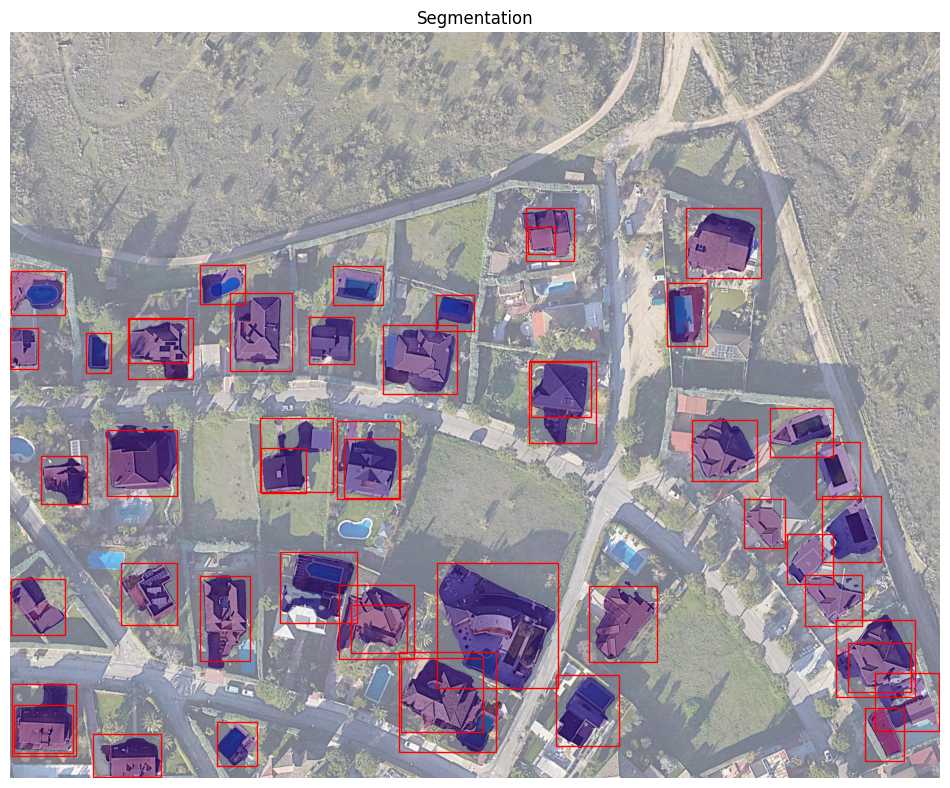

In [ ]:
sam.show_anns(
    cmap='Purples',
    box_color='red',
    title='Segmentation',
    blend=True,
)

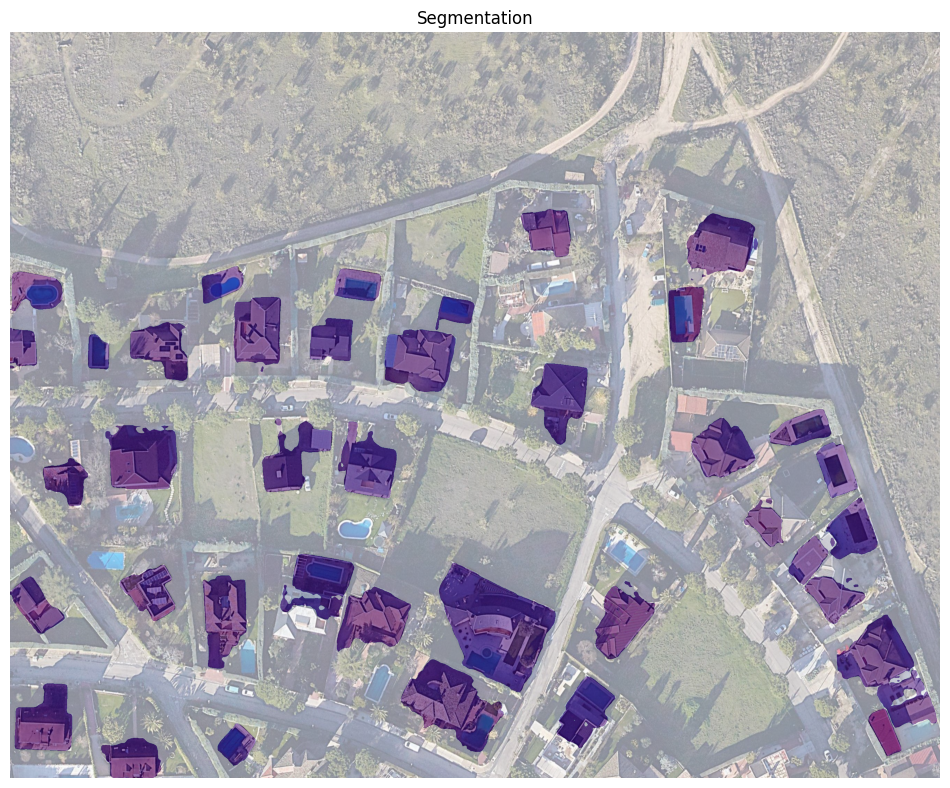

In [ ]:
sam.show_anns(
    cmap='Purples',
    add_boxes=False, # No boxes on objects
    alpha=0.5,
    title='Segmentation',
)

## Save results

Save results in .tiff format

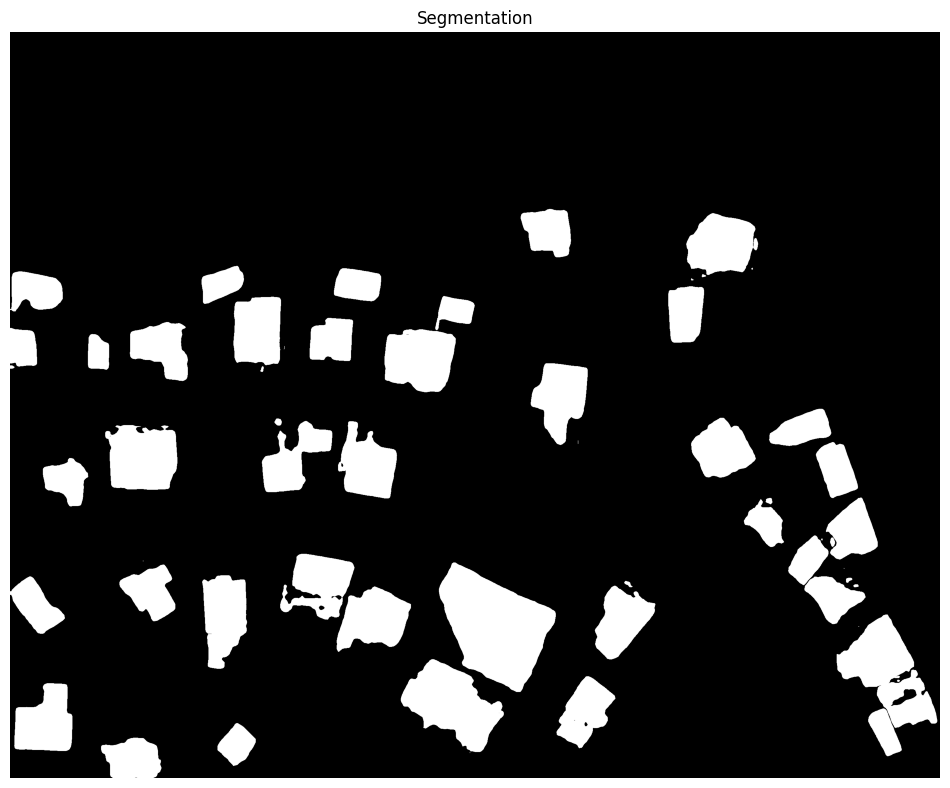

In [ ]:
sam.show_anns(
    cmap='Greys_r',
    add_boxes=False,
    alpha=1,
    title='Segmentation',
    blend=False,
    output='buildings.tif',
)

Save results in vctorial format .shp

In [ ]:
sam.raster_to_vector("buildings.tif", "buildings.shp")

## Interactive image

In [ ]:
m.add_raster("buildings.tif", layer_name="Buildings", palette="Purples", opacity=0.5, nodata=0)
style = {
    "color": "#3388ff",
    "weight": 2,
    "fillColor": "#7c4185",
    "fillOpacity": 0.5,
}
m.add_vector("buildings.shp", layer_name="Vector", style=style)
m

TypeError: get_cmap expects None or an instance of a str or Colormap . you passed ['#fcfbfd', '#fcfbfd', '#fbfafc', '#fbfafc', '#faf9fc', '#faf9fc', '#faf8fb', '#f9f8fb', '#f9f7fb', '#f8f7fb', '#f8f7fa', '#f8f6fa', '#f7f6fa', '#f7f5fa', '#f6f5f9', '#f6f4f9', '#f5f4f9', '#f5f4f9', '#f5f3f8', '#f4f3f8', '#f4f2f8', '#f3f2f8', '#f3f1f7', '#f3f1f7', '#f2f0f7', '#f2f0f7', '#f1f0f6', '#f1eff6', '#f1eff6', '#f0eef6', '#f0eef5', '#efedf5', '#efedf5', '#eeecf5', '#eeecf4', '#edebf4', '#ecebf4', '#eceaf3', '#ebe9f3', '#eae9f3', '#eae8f2', '#e9e8f2', '#e8e7f2', '#e8e6f2', '#e7e6f1', '#e6e5f1', '#e6e5f1', '#e5e4f0', '#e4e3f0', '#e4e3f0', '#e3e2ef', '#e2e2ef', '#e2e1ef', '#e1e0ee', '#e0e0ee', '#e0dfee', '#dfdfed', '#dedeed', '#dedded', '#ddddec', '#dcdcec', '#dcdcec', '#dbdbec', '#dadaeb', '#dadaeb', '#d9d9ea', '#d8d8ea', '#d7d7e9', '#d6d6e9', '#d5d5e9', '#d4d4e8', '#d3d3e8', '#d2d2e7', '#d1d2e7', '#d0d1e6', '#cfd0e6', '#cecfe5', '#cecee5', '#cdcde4', '#cccce4', '#cbcbe3', '#cacae3', '#c9c9e2', '#c8c8e2', '#c7c8e1', '#c6c7e1', '#c5c6e1', '#c4c5e0', '#c3c4e0', '#c2c3df', '#c1c2df', '#c0c1de', '#bfc0de', '#bebfdd', '#bebedd', '#bdbedc', '#bcbddc', '#bbbbdb', '#babadb', '#b9b9da', '#b8b8d9', '#b7b7d9', '#b6b6d8', '#b5b5d7', '#b4b4d7', '#b3b3d6', '#b2b2d5', '#b1b1d5', '#b0afd4', '#afaed4', '#aeadd3', '#aeacd2', '#adabd2', '#acaad1', '#aba9d0', '#aaa8d0', '#a9a7cf', '#a8a6cf', '#a7a4ce', '#a6a3cd', '#a5a2cd', '#a4a1cc', '#a3a0cb', '#a29fcb', '#a19eca', '#a09dca', '#9f9cc9', '#9e9bc8', '#9e9ac8', '#9d99c7', '#9c98c7', '#9b97c6', '#9a96c6', '#9995c6', '#9894c5', '#9793c5', '#9692c4', '#9591c4', '#9490c3', '#9390c3', '#928fc3', '#918ec2', '#908dc2', '#8f8cc1', '#8e8bc1', '#8e8ac0', '#8d89c0', '#8c88bf', '#8b87bf', '#8a86bf', '#8986be', '#8885be', '#8784bd', '#8683bd', '#8582bc', '#8481bc', '#8380bb', '#827fbb', '#817ebb', '#807dba', '#807cba', '#7f7bb9', '#7e79b8', '#7d78b7', '#7d77b7', '#7c75b6', '#7b74b5', '#7b72b4', '#7a71b4', '#7970b3', '#796eb2', '#786db2', '#776cb1', '#776ab0', '#7669af', '#7567af', '#7566ae', '#7465ad', '#7363ad', '#7262ac', '#7261ab', '#715faa', '#705eaa', '#705ca9', '#6f5ba8', '#6e5aa8', '#6e58a7', '#6d57a6', '#6c55a5', '#6c54a5', '#6b53a4', '#6a51a3', '#6950a3', '#694fa2', '#684da1', '#674ca1', '#674ba0', '#66499f', '#65489f', '#65479e', '#64459e', '#63449d', '#63439c', '#62429c', '#61409b', '#613f9a', '#603e9a', '#5f3c99', '#5e3b98', '#5e3a98', '#5d3897', '#5c3797', '#5c3696', '#5b3495', '#5a3395', '#5a3294', '#593093', '#582f93', '#582e92', '#572c92', '#562b91', '#552a90', '#552890', '#54278f', '#53268f', '#53258e', '#52238d', '#51228d', '#51218c', '#50208c', '#4f1f8b', '#4f1d8b', '#4e1c8a', '#4d1b89', '#4d1a89', '#4c1888', '#4c1788', '#4b1687', '#4a1587', '#4a1486', '#491285', '#481185', '#481084', '#470f84', '#460d83', '#460c83', '#450b82', '#440a82', '#440981', '#430780', '#420680', '#42057f', '#41047f', '#40027e', '#40017e', '#3f007d'] of type <class 'list'>

## GUI to do the same we did with this notebook

In [ ]:
s = sam.show_map(basemap = 'SATELLITE')
s.add_basemap("HYBRID")
s

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…